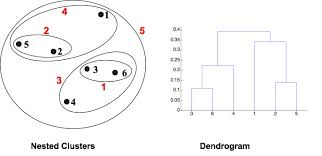

In [20]:
from IPython.display import Image
Image('/home/adish/Desktop/hiera1.jpeg')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
df = pd.read_csv('/home/adish/Desktop/Mall_Customers.csv')
x = df.iloc[:, [3, 4]].values
print(x)
dataset

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Finding optimal number of clusters using Dendrogram

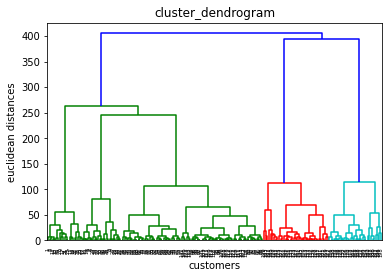

In [5]:
import scipy.cluster.hierarchy as sch#this module contains the function to build the dendrogram
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))#method=ward,minimizes the variance inside each cluster
plt.title('cluster_dendrogram')
plt.xlabel('customers')
plt.ylabel('euclidean distances')
plt.show()


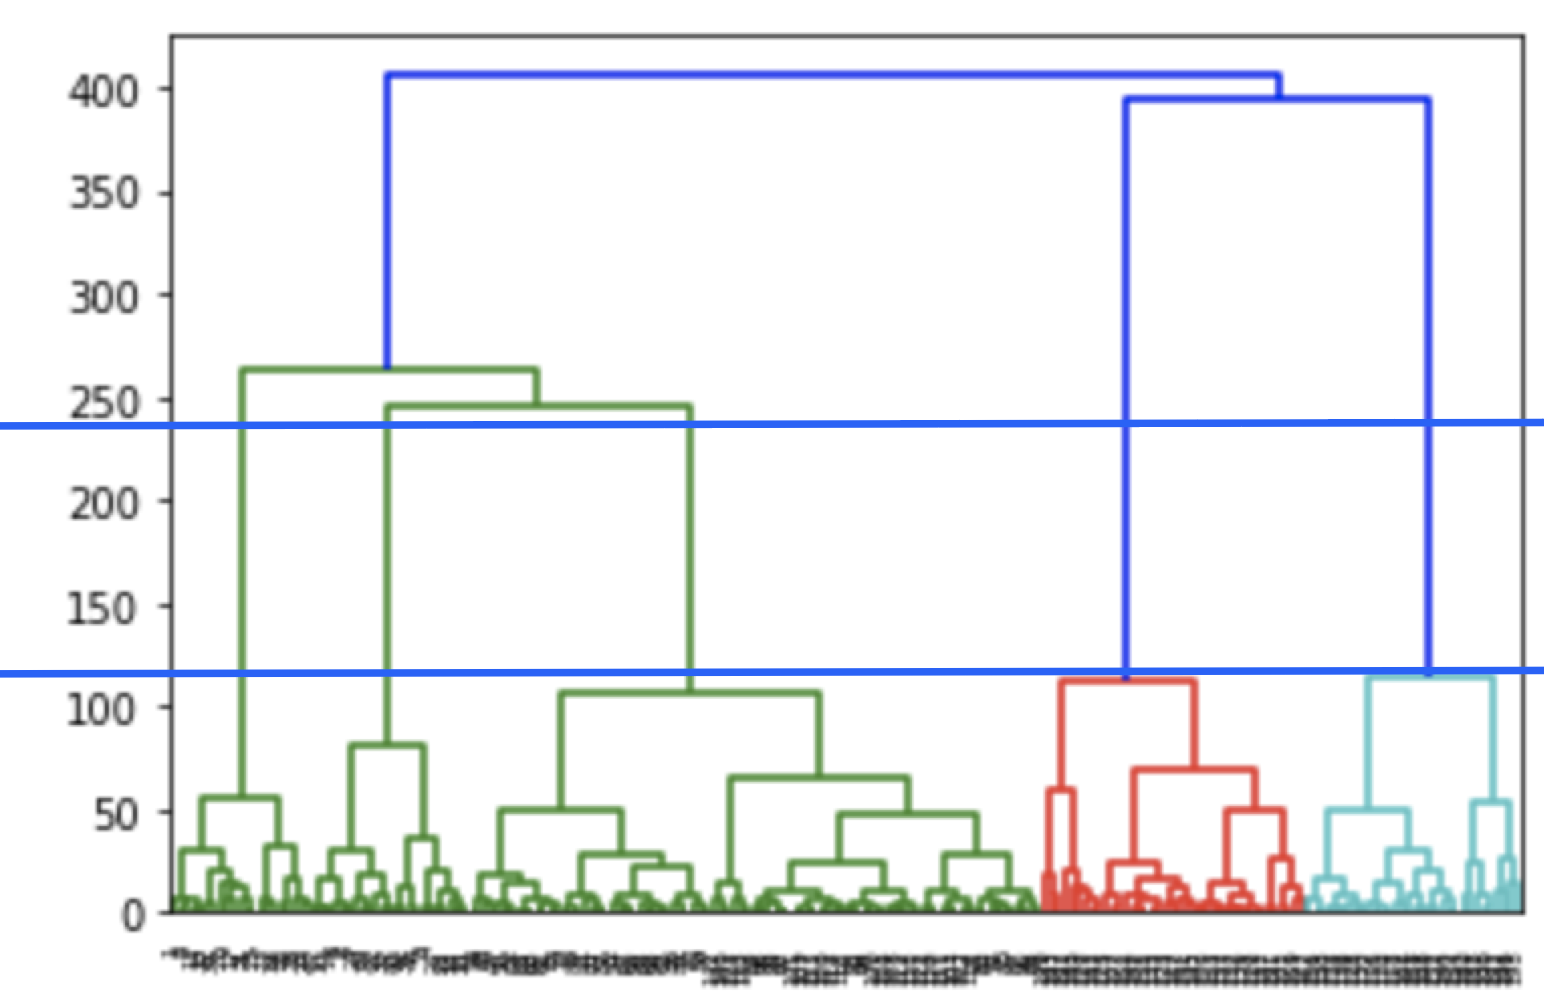

In [21]:
from IPython.display import Image
Image('/home/adish/Desktop/hiera.png')

In [7]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')#affinity-->indicates the type of distance used to measure variance within your clusters
y_hc=hc.fit_predict(x)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

### fit vs fit_transform


To center the data (make it have zero mean and unit standard error), you subtract the mean and then divide the result by the standard deviation:

x′=x−μσ

You do that on the training set of data. But then you have to apply the same transformation to your testing set (e.g. in cross-validation), or to newly obtained examples before forecast. But you have to use the exact same two parameters μ and σ (values) that you used for centering the training set.

Hence, every sklearn's transform's fit() just calculates the parameters (e.g. μ and σ in case of StandardScaler) and saves them as an internal object's state. Afterwards, you can call its transform() method to apply the transformation to any particular set of examples.

fit_transform() joins these two steps 

In [9]:
df['clusters']=y_hc
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
1,2,Male,21,15,81,3
3,4,Female,23,16,77,3
5,6,Female,22,17,76,3
7,8,Female,23,18,94,3
9,10,Female,30,19,72,3
11,12,Female,35,19,99,3
13,14,Female,24,20,77,3
15,16,Male,22,20,79,3
17,18,Male,20,21,66,3
19,20,Female,35,23,98,3


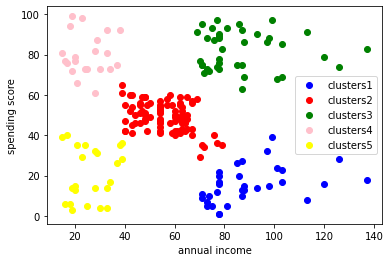

In [19]:
#plotting centroids along with clusterss 

dfc1=df[df.clusters==0]
dfc2=df[df.clusters==1]
dfc3=df[df.clusters==2]
dfc4=df[df.clusters==3]
dfc5=df[df.clusters==4]
plt.scatter(dfc1['Annual Income (k$)'],dfc1['Spending Score (1-100)'],color='blue',label='clusters1')
plt.scatter(dfc2['Annual Income (k$)'],dfc2['Spending Score (1-100)'],color='red',label='clusters2')
plt.scatter(dfc3['Annual Income (k$)'],dfc3['Spending Score (1-100)'],color='green',label='clusters3')
plt.scatter(dfc4['Annual Income (k$)'],dfc4['Spending Score (1-100)'],color='pink',label='clusters4')
plt.scatter(dfc5['Annual Income (k$)'],dfc5['Spending Score (1-100)'],color='yellow',label='clusters5')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.legend()
dfc4